In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('CO2_emission.data.csv')
df

,Entity,Code,Year,Annual CO2 emissions (tonnes)
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [3]:
duplicates = ~df.duplicated(subset=['Entity']).sum()
num_countries = df['Entity'].size + duplicates 
print(num_countries)

232


The data provided in CO2_emission.data.csv contains CO2 emission information from 232 countries. We will only use the information from the top 15 countries with highest gross domestic product (GDP) for this analysis. There is a known positive correlation between countries with a higher GDP and carbon emissions. 

According to Wikipedia, the 15 countries with the highest GDP (in descending order) are: United States, China, Japan, Germany, United Kingdom, India, France, Italy, Canada, South Korea, Russia, Brazil, Australia, Spain, and Mexico. These are the countries we will use for analysis. Notice that this order is the current ordering of highest GDP countries in the year 2021, not in the year 2017. 

<font size="3">Data Cleaning</font>

In [4]:
# Many of the emissions entries in the csv are zero
# We will remove these entries and focus on the non-zero entries only 
df = df[df['Annual CO2 emissions (tonnes)'] != 0]

In [5]:
countries = pd.Series(['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'France', 'Italy', 
                       'Canada', 'South Korea', 'Russia', 'Brazil', 'Australia', 'Spain', 'Mexico',
                      ])

for i in range(15):
    countries[i] = df[df['Entity'] == countries[i]]

# Here we will associate each of the countries with the following colors respectively
# These colors will be used in various graphs across the analysis for ease of understanding
colors = ['dodgerblue','red','orange','slateblue','mediumorchid','limegreen','yellowgreen','peru','deeppink','sandybrown',
          'crimson','deepskyblue','indianred','tomato','gold']

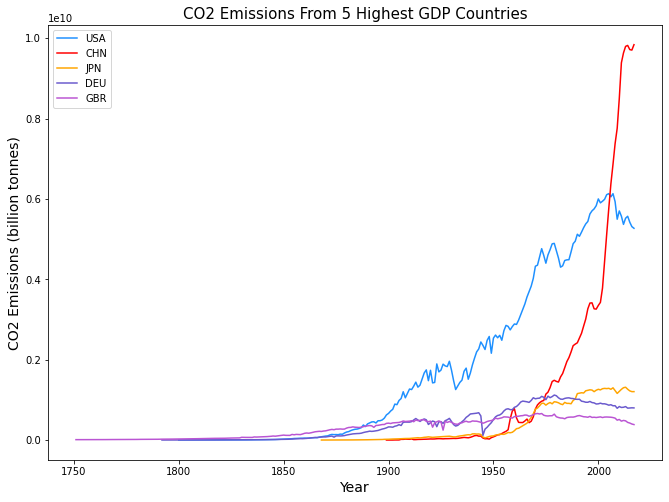

In [6]:
figure(figsize=(11, 8))
plt.title('CO2 Emissions From 5 Highest GDP Countries', fontsize=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Emissions (billion tonnes)', fontsize=14)

for i in range(5):
    plt.plot(countries[i]['Year'], countries[i]['Annual CO2 emissions (tonnes)'], 
             color=colors[i], label=countries[i]['Code'].iloc[-1])

plt.legend();

In [7]:
# Select decade samples from 1950-current
emissions = [[0 for i in range(9)] for j in range(15)]

# The 10th country, Russia, does not start recording emissions information until 1959
# We will substitute the 1950's sample with zero for Russia only

for i in range(15):
    for k in range(7):
        emissions[i][k] = countries[i][countries[i]['Year'] == (1950 + 10*k)]['Annual CO2 emissions (tonnes)']
    emissions[i][7] = countries[i][countries[i]['Year'] == (2017)]['Annual CO2 emissions (tonnes)'].iloc[0]
    emissions[i][8] = countries[i]['Code'].iloc[-1]
    
emissions[10][0] = 0

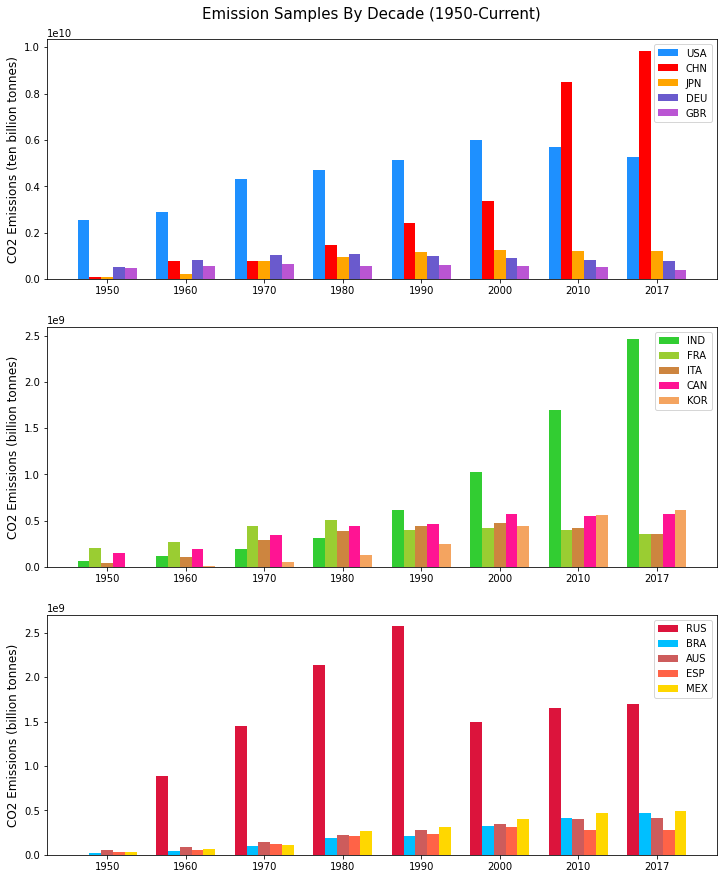

In [8]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2017]

x = np.arange(len(years))
width = 0.15

fig, axs = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(12)
    
for i in range(3):
    axs[i].bar(x - 2*width, emissions[5*i][0:8], color = colors[5*i], width = width, label=emissions[5*i][8])
    axs[i].bar(x - width, emissions[5*i+1][0:8], color = colors[5*i+1], width = width, label=emissions[5*i+1][8])
    axs[i].bar(x, emissions[5*i+2][0:8], color = colors[5*i+2], width = width, label=emissions[5*i+2][8])
    axs[i].bar(x + width, emissions[5*i+3][0:8], color = colors[5*i+3], width = width, label=emissions[5*i+3][8])
    axs[i].bar(x + 2*width, emissions[5*i+4][0:8], color = colors[5*i+4], width = width, label=emissions[5*i+4][8])
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(years)
    axs[i].legend()
    
axs[0].set_ylabel('CO2 Emissions (ten billion tonnes)', fontsize=12)
axs[1].set_ylabel('CO2 Emissions (billion tonnes)', fontsize=12)
axs[2].set_ylabel('CO2 Emissions (billion tonnes)', fontsize=12)
    
fig.suptitle('Emission Samples By Decade (1950-Current)', y=.91, fontsize=15);

In [9]:
# Collect emissions data from the last 5 recorded years (2013-2017)
emissions = [[0 for i in range(6)] for j in range(15)]
mean_emissions = [0 for i in range(15)]

for i in range(15):
    for k in range(5):
        emissions[i][k] = countries[i][countries[i]['Year'] == (2013 + k)]['Annual CO2 emissions (tonnes)'].iloc[-1]/1000000000
    emissions[i][5] = countries[i]['Code'].iloc[-1]
    mean_emissions[i] = np.mean(emissions[i][0:5])

In [10]:
# Sort emissions data in descending order, by greatest means
zipped_lists = zip(mean_emissions, emissions, colors) 
sorted_pairs = sorted(zipped_lists, reverse=True)

tuples = zip(*sorted_pairs)
mean_emissions, emissions, colors_1 = [list(tuple) for tuple in  tuples]

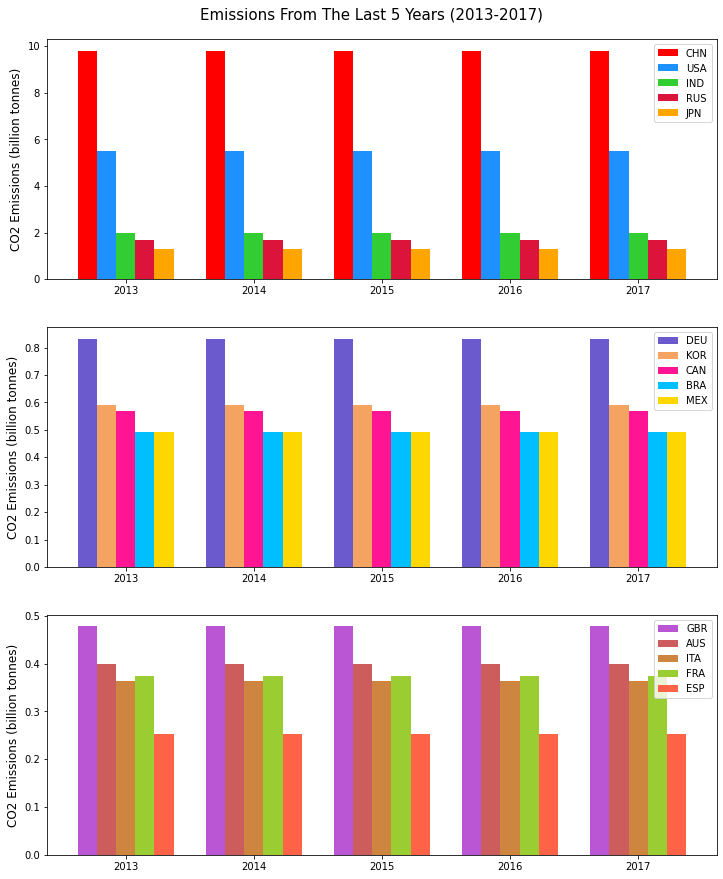

In [11]:
years = [2013, 2014, 2015, 2016, 2017]

x = np.arange(len(years))
width = 0.15

fig, axs = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(12)

for i in range(3):
    axs[i].bar(x - 2*width, emissions[5*i][0], color = colors_1[5*i], width = width, label=emissions[5*i][5])
    axs[i].bar(x - width, emissions[5*i+1][0], color = colors_1[5*i+1], width = width, label=emissions[5*i+1][5])
    axs[i].bar(x, emissions[5*i+2][0], color = colors_1[5*i+2], width = width, label=emissions[5*i+2][5])
    axs[i].bar(x + width, emissions[5*i+3][0], color = colors_1[5*i+3], width = width, label=emissions[5*i+3][5])
    axs[i].bar(x + 2*width, emissions[5*i+4][0], color = colors_1[5*i+4], width = width, label=emissions[5*i+4][5])
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(years)
    axs[i].legend()
    axs[i].set_ylabel('CO2 Emissions (billion tonnes)', fontsize=12)

fig.suptitle('Emissions From The Last 5 Years (2013-2017)', y=.91, fontsize=15);

In [12]:
# Collect data from the last 10 years 
decade_data = [[0 for i in range(2)] for j in range(15)] 
sum_emissions  = [[0 for i in range(2)] for j in range(15)] 

for i in range(15):
        decade_data[i][0] = countries[i][countries[i]['Year'] >=2007]['Annual CO2 emissions (tonnes)']/1000000000
        decade_data[i][1] = countries[i]['Code'].iloc[-1]
        sum_emissions[i][0] = sum(decade_data[i][0])
        sum_emissions[i][1] = countries[i]['Entity'].iloc[-1]
    
total_emissions = sum([sum_emissions[i][0] for i in range(15)])
percent_emissions = [np.asarray(sum_emissions[i][0]) / total_emissions for i in range(15)]

In [13]:
# Organize countries by highest percent total emissions from the last 10 years 
zipped_lists = zip(percent_emissions, decade_data, sum_emissions, colors) 
sorted_pairs = sorted(zipped_lists, reverse=True)

tuples = zip(*sorted_pairs)
percent_emissions, decade_data, sum_emissions, colors_2 = [list(tuple) for tuple in  tuples]

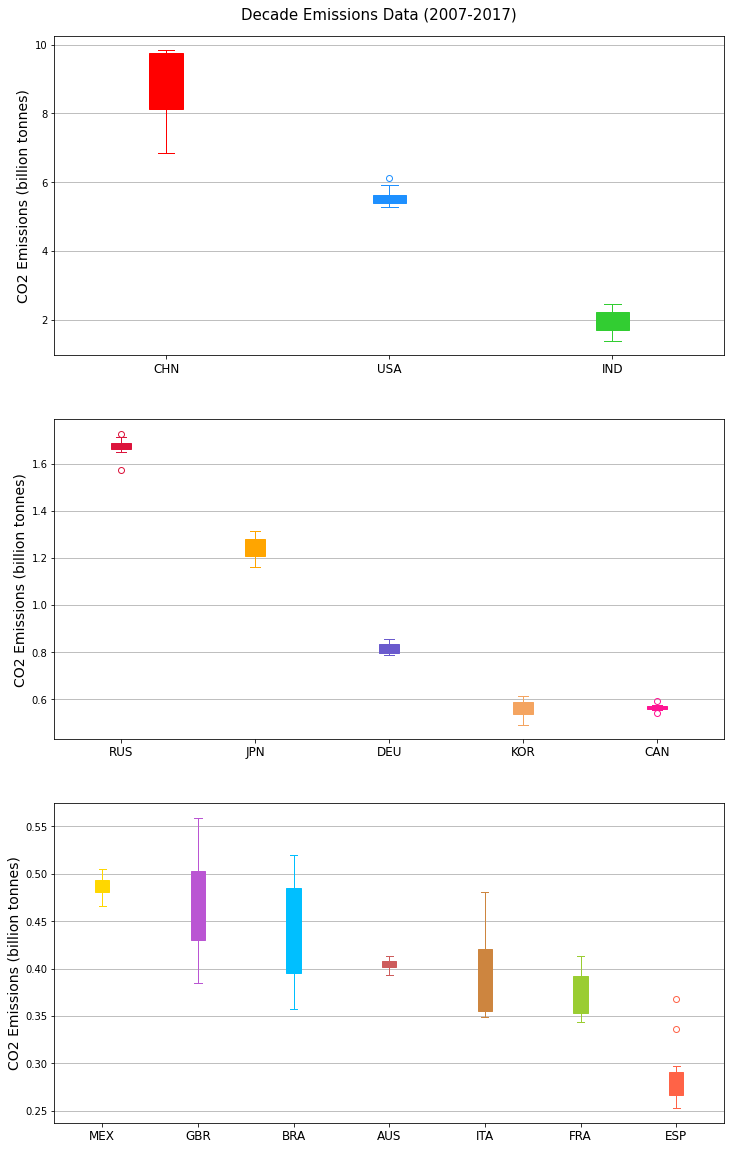

In [14]:
labels = [decade_data[i][1] for i in range(15)]
data = [decade_data[i][0] for i in range(15)]

fig, axs = plt.subplots(3,1)
fig.set_figheight(20)
fig.set_figwidth(12)

for i in range(3): 
    box = axs[0].boxplot(data[i], positions=[i], patch_artist=True)   
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box[item], color=colors_2[i])
        plt.setp(box["boxes"], facecolor=colors_2[i])
        plt.setp(box["fliers"], markeredgecolor=colors_2[i])
axs[0].set_xticklabels(labels[0:3], fontsize=12)

for i in range(3,8): 
    box = axs[1].boxplot(data[i], positions=[i], patch_artist=True)   
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box[item], color=colors_2[i])
        plt.setp(box["boxes"], facecolor=colors_2[i])
        plt.setp(box["fliers"], markeredgecolor=colors_2[i])
axs[1].set_xticklabels(labels[3:8], fontsize=12)

for i in range(8,15): 
    box = axs[2].boxplot(data[i], positions=[i], patch_artist=True)   
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box[item], color=colors_2[i])
        plt.setp(box["boxes"], facecolor=colors_2[i])
        plt.setp(box["fliers"], markeredgecolor=colors_2[i])
axs[2].set_xticklabels(labels[8:], fontsize=12)

for axs in [axs[0], axs[1], axs[2]]:
    axs.yaxis.grid(True)
    axs.set_ylabel('CO2 Emissions (billion tonnes)', fontsize=14)

    
fig.suptitle('Decade Emissions Data (2007-2017)', y=.9, fontsize=15);

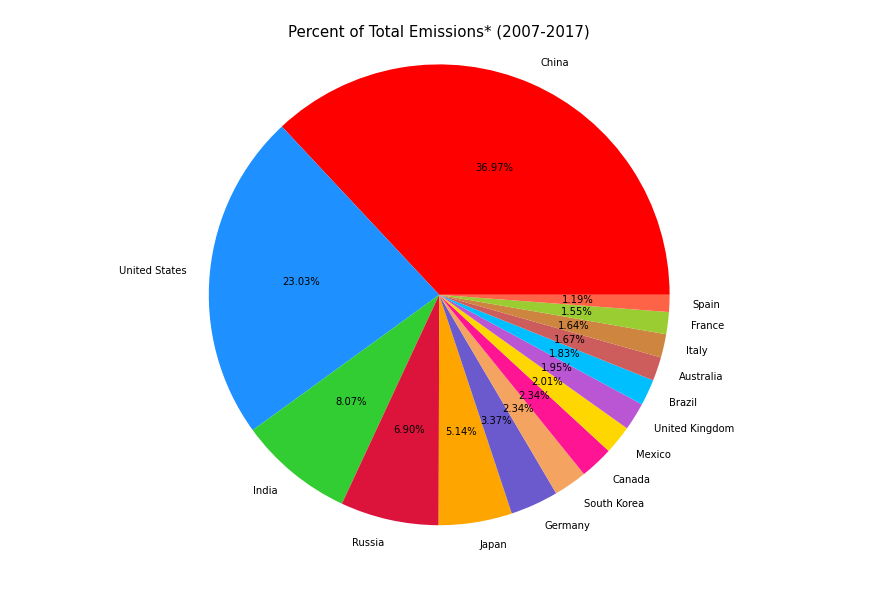

In [15]:
labels = [sum_emissions[i][1] for i in range(15)]
data = [sum_emissions[i][0] for i in range(15)]

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')                   
ax.pie(data, colors = colors_2, labels=labels, autopct='%1.2f%%');
fig.suptitle('Percent of Total Emissions* (2007-2017)', fontsize=15, y=.97);

Note that the previous visualizations are not representative of total global emissions. 
Only the first 15 highest grossing countries were inluded in this data analysis because emissions from other countries are considered statistically insignificant in comparison to emissions from the first 15 countries.
The percents given here are the percent of total emissions from the top 15 countries with the highest GDP. 